In [38]:
8-3

5

# Setup

The following are standard imports, utility functions, and other environment setups

## Imports

In [1]:
# Used to read .env files, for access tokens and other secrets or configurations
%load_ext dotenv
%dotenv
import os

In [2]:
import math
import numpy
from datetime import datetime, timedelta

In [3]:
from github import Github
import pandas
from matplotlib import pyplot
import seaborn

## Figure style

In [4]:
seaborn.set_theme()
seaborn.set_style('whitegrid')
from IPython.core.pylabtools import figsize
figsize(10, 5)

## Utility Functions

In [5]:
def attrgetter(attr):
    return lambda obj: obj and getattr(obj, attr)

In [6]:
# For better readability, we use statements pandas considers "bad"
pandas.options.mode.chained_assignment = None

---
# Team Constants

<font color='blue' size='4'>
These are things that describe how the team work. They are static with regard to retrospectives but might evolve.

The scrum master is the person responsible maintains these</font>

## Sprint Management

In [8]:
# In the following, we will assume that sprints are totally regular, starting with a fixed date.
# The helper functions can of course be adapted to represent, e.g., changes in sprint duration or holiday breaks

start_date_first_sprint = datetime(2020, 4, 27) # It's a monday, development actually started 02.05.2020
sprint_length = timedelta(weeks=2)

def date_to_sprint(date_to_convert):
    return max(0, (date_to_convert - start_date_first_sprint) // sprint_length + 1) # Sprint "0" is everything before the first

def sprint_to_start_date(sprint_to_convert):
    return (start_date_first_sprint + (sprint_to_convert - 1) * sprint_length)

def date_to_sprint_start(date_to_convert):
    return sprint_to_start_date(date_to_sprint(date_to_convert))

## Data Sources

In [7]:
# The github token is stored in a .env file next to this notebook in the form "GITHUB_TOKEN = <your token here>"
github = Github(os.getenv("GITHUB_TOKEN"))

In [9]:
app_repo = github.get_repo('corona-warn-app/cwa-app-android')

## Team Members

Note: The list of team handles includes many more than the actual current team - because this is an open source project, there was a lot of fluctuation of personnel.

In [10]:
app_team = list(map(
lambda username: github.get_user(username),
[
 'mlenkeit',
 'MikeMcC399',
 'ksergeevit',
 'tklingbeil',
 'tkowark',
 'CV113',
 'fynngodau',
 'oemerb',
 'kaddaSz',
 'AndroidMedaGalaxy',
 'Fabian-K',
 'HeeTattSap',
 'marcmuschko',
 'NataliaLemmerth',
 'KathrinLuecke',
 'Oliver-Zimmerman',
 'chris-cwa',
 'pwoessner',
 'janetback',
 'schauersbergern',
 'LukasLechnerDev',
 'kolyaopahle',
 'axelherbstreith',
 'service-tip-git',
 'AlexanderAlferov',
 'jakobmoellersap',
 'marcauberer',
 'Corona-Warn-App-Technical-User',
 'chiljamgossow',
 'SamuraiKek',
 'BMItr',
 'jurajkusnier',
 'ralfgehrer',
 'd4rken',
 'harambasicluka',
 'mtwalli'
]))
app_team

[NamedUser(login="mlenkeit"),
 NamedUser(login="MikeMcC399"),
 NamedUser(login="ksergeevit"),
 NamedUser(login="tklingbeil"),
 NamedUser(login="tkowark"),
 NamedUser(login="CV113"),
 NamedUser(login="fynngodau"),
 NamedUser(login="oemerb"),
 NamedUser(login="kaddaSz"),
 NamedUser(login="AndroidMedaGalaxy"),
 NamedUser(login="Fabian-K"),
 NamedUser(login="HeeTattSap"),
 NamedUser(login="marcmuschko"),
 NamedUser(login="NataliaLemmerth"),
 NamedUser(login="KathrinLuecke"),
 NamedUser(login="Oliver-Zimmerman"),
 NamedUser(login="chris-cwa"),
 NamedUser(login="pwoessner"),
 NamedUser(login="janetback"),
 NamedUser(login="schauersbergern"),
 NamedUser(login="LukasLechnerDev"),
 NamedUser(login="kolyaopahle"),
 NamedUser(login="axelherbstreith"),
 NamedUser(login="service-tip-git"),
 NamedUser(login="AlexanderAlferov"),
 NamedUser(login="jakobmoellersap"),
 NamedUser(login="marcauberer"),
 NamedUser(login="Corona-Warn-App-Technical-User"),
 NamedUser(login="chiljamgossow"),
 NamedUser(login=

In [11]:
today = date_to_sprint_start(datetime(day=1, month=8, year=2022)) # Normally this would of course be the real today

---
# Retrospective Preparation

<font color='blue' size='4'>
The community manager has reported that community issues recently take a long time until a developer reacts 
<br>-> The retrospective facilitator (Scrum Master) has decided to bring this topic up in the next retrospective 
<br>-> The retrospective facilitator knows that work items and their arrival time are evidence for this kind of community interaction
<br>-> To save time, they execute data collection and preparation before the retrospective

Let's limit the data under observation to approximately the last year, for reasons of relevance and efficiency

In [12]:
time_of_interest = date_to_sprint_start(today - timedelta(days=8*30))
(today, time_of_interest)

(datetime.datetime(2022, 8, 1, 0, 0), datetime.datetime(2021, 11, 22, 0, 0))

## Data Collection and Preprocessing

In [13]:
repo = app_repo

In [14]:
%%time
issues_raw = repo.get_issues(state='all', since=time_of_interest)
issues_dataframe = pandas.DataFrame(issues_raw, columns=['issue'])

CPU times: user 861 ms, sys: 0 ns, total: 861 ms
Wall time: 39.8 s


In [15]:
issues_dataframe['issue_number'] = issues_dataframe.issue.apply(attrgetter('number'))
issues_dataframe['created_at'] = issues_dataframe.issue.apply(attrgetter('created_at'))
issues_dataframe = issues_dataframe[(issues_dataframe.created_at >= time_of_interest) & (issues_dataframe.created_at < today)] # < today is used here to simulate the retro start date
issues_dataframe['closed_at'] = issues_dataframe.issue.apply(attrgetter('closed_at'))
issues_dataframe['created_sprint'] = issues_dataframe.created_at.apply(lambda date: date_to_sprint_start(date).date())
issues_dataframe['closed_sprint'] = issues_dataframe.closed_at.apply(lambda date: date and date_to_sprint_start(date).date())
issues_dataframe

,issue,issue_number,created_at,closed_at,created_sprint,closed_sprint
321,"Issue(title=""Hinweis zur Auffrischimpfung Bena...",5400,2022-07-31 18:29:36,2022-08-26 12:00:28,2022-07-18,2022-08-15
322,"Issue(title=""Fix back navigation for UQS when ...",5399,2022-07-29 11:34:16,2022-07-29 14:14:20,2022-07-18,2022-07-18
323,"Issue(title=""https link to RKI STIKO (EXPOSURE...",5398,2022-07-29 06:50:46,2022-07-29 07:50:34,2022-07-18,2022-07-18
324,"Issue(title=""Status update is not working on a...",5397,2022-07-28 23:57:50,2022-08-11 09:45:35,2022-07-18,2022-08-01
325,"Issue(title=""Support Material You themed icons...",5396,2022-07-28 20:43:32,NaT,2022-07-18,2020-04-13
...,...,...,...,...,...,...
1265,"Issue(title=""DCC Ticketing: navigation to Cons...",4424,2021-11-22 13:26:35,2021-11-23 13:19:24,2021-11-22,2021-11-22
1266,"Issue(title=""DCC Ticketing: Consent I navigati...",4423,2021-11-22 13:02:31,2021-11-22 13:25:00,2021-11-22,2021-11-22
1267,"Issue(title=""Certificate Pinning (EXPOSUREAPP-...",4422,2021-11-22 12:41:23,2021-11-23 12:16:15,2021-11-22,2021-11-22
1268,"Issue(title=""Dcc Ticketing skeleton part II (E...",4421,2021-11-22 11:36:58,2021-11-22 12:46:21,2021-11-22,2021-11-22


In [16]:
def is_issue(issue): # "Issues" returned by GitHub API can also be Pull Requests which we want to ignore
    return 'issues' in issue.html_url

def is_community_issue(issue): # Issues created by the development team do not represent community interaction
    return is_issue(issue) and not issue.user in app_team

In [17]:
%%time
community_issues = issues_dataframe[issues_dataframe.issue.apply(is_community_issue)]
community_issues

CPU times: user 13.5 ms, sys: 0 ns, total: 13.5 ms
Wall time: 23.4 ms


,issue,issue_number,created_at,closed_at,created_sprint,closed_sprint
321,"Issue(title=""Hinweis zur Auffrischimpfung Bena...",5400,2022-07-31 18:29:36,2022-08-26 12:00:28,2022-07-18,2022-08-15
324,"Issue(title=""Status update is not working on a...",5397,2022-07-28 23:57:50,2022-08-11 09:45:35,2022-07-18,2022-08-01
325,"Issue(title=""Support Material You themed icons...",5396,2022-07-28 20:43:32,NaT,2022-07-18,2020-04-13
352,"Issue(title=""v2.25.0-RC2 is tagged as ""Lates"" ...",5368,2022-07-20 12:15:11,2022-07-20 20:07:58,2022-07-18,2022-07-18
365,"Issue(title=""Contact Journal: Duration of plac...",5354,2022-07-16 09:20:08,2022-09-28 10:26:15,2022-07-04,2022-09-26
...,...,...,...,...,...,...
1235,"Issue(title=""The app displays a wrong vaccinat...",4454,2021-11-30 10:20:01,2021-11-30 12:28:42,2021-11-22,2021-11-22
1244,"Issue(title=""Showing an antigen test results t...",4445,2021-11-29 14:40:25,2021-11-29 15:15:58,2021-11-22,2021-11-22
1245,"Issue(title=""Entering birth date when adding a...",4496,2021-11-29 14:25:47,NaT,2021-11-22,2020-04-13
1247,"Issue(title=""where I can find the app"", number...",4443,2021-11-28 06:22:40,2022-03-03 11:29:22,2021-11-22,2022-02-28


In [18]:
%%time
community_issues['comments'] = community_issues.issue.apply(lambda issue: list(issue.get_comments()))
community_issues

CPU times: user 676 ms, sys: 58.7 ms, total: 735 ms
Wall time: 42.1 s


,issue,issue_number,created_at,closed_at,created_sprint,closed_sprint,comments
321,"Issue(title=""Hinweis zur Auffrischimpfung Bena...",5400,2022-07-31 18:29:36,2022-08-26 12:00:28,2022-07-18,2022-08-15,"[IssueComment(user=NamedUser(login=""MikeMcC399..."
324,"Issue(title=""Status update is not working on a...",5397,2022-07-28 23:57:50,2022-08-11 09:45:35,2022-07-18,2022-08-01,"[IssueComment(user=NamedUser(login=""dsarkar""),..."
325,"Issue(title=""Support Material You themed icons...",5396,2022-07-28 20:43:32,NaT,2022-07-18,2020-04-13,"[IssueComment(user=NamedUser(login=""Ein-Tim""),..."
352,"Issue(title=""v2.25.0-RC2 is tagged as ""Lates"" ...",5368,2022-07-20 12:15:11,2022-07-20 20:07:58,2022-07-18,2022-07-18,"[IssueComment(user=NamedUser(login=""mtwalli""),..."
365,"Issue(title=""Contact Journal: Duration of plac...",5354,2022-07-16 09:20:08,2022-09-28 10:26:15,2022-07-04,2022-09-26,"[IssueComment(user=NamedUser(login=""dsarkar""),..."
...,...,...,...,...,...,...,...
1235,"Issue(title=""The app displays a wrong vaccinat...",4454,2021-11-30 10:20:01,2021-11-30 12:28:42,2021-11-22,2021-11-22,"[IssueComment(user=NamedUser(login=""MikeMcC399..."
1244,"Issue(title=""Showing an antigen test results t...",4445,2021-11-29 14:40:25,2021-11-29 15:15:58,2021-11-22,2021-11-22,"[IssueComment(user=NamedUser(login=""Ein-Tim""),..."
1245,"Issue(title=""Entering birth date when adding a...",4496,2021-11-29 14:25:47,NaT,2021-11-22,2020-04-13,"[IssueComment(user=NamedUser(login=""MikeMcC399..."
1247,"Issue(title=""where I can find the app"", number...",4443,2021-11-28 06:22:40,2022-03-03 11:29:22,2021-11-22,2022-02-28,"[IssueComment(user=NamedUser(login=""MikeMcC399..."


---
# Retrospective Execution

## Assessing previous measures: Backlog Size

<font color='red' size=4> <b> TODO make this

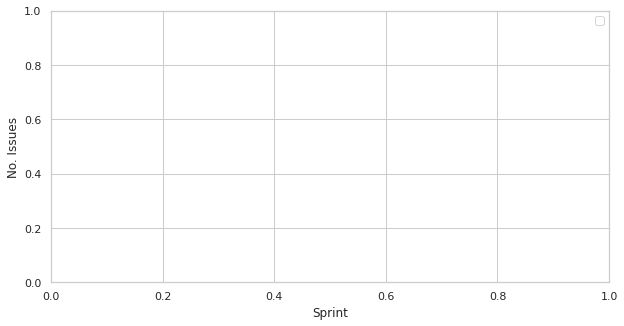

In [19]:
figure, axes = pyplot.subplots()
#pyplot.bar(issues_focus.index, issues_focus['open_at_start'])
axes.set_xlabel("Sprint")
axes.set_ylabel("No. Issues")
#axes.set_xticks(issues_focus.index)
axes.legend(['open_at_start'])
print() # silence output from command before

## Finding Problems: Long Reaction Times

### Calculating Reaction Times

In [20]:
def first_reaction(issue, comment_list):
    return next((comment for comment in comment_list if comment.user != issue.user), None)

In [21]:
community_issues['first_reaction']      = community_issues.apply(lambda row: first_reaction(row.issue, row.comments), axis=1)
community_issues['time_to_react']       = community_issues.first_reaction.apply(attrgetter('created_at')) - community_issues.created_at
# Pandas sometimes doesn't like temporal data for visualization, so we convert to numerical
community_issues['time_to_react_hours'] = (community_issues.time_to_react / pandas.Timedelta(hours=1)) 
community_issues['time_to_react_days']  = (community_issues.time_to_react / pandas.Timedelta(days=1)) 
community_issues

,issue,issue_number,created_at,closed_at,created_sprint,closed_sprint,comments,first_reaction,time_to_react,time_to_react_hours,time_to_react_days
321,"Issue(title=""Hinweis zur Auffrischimpfung Bena...",5400,2022-07-31 18:29:36,2022-08-26 12:00:28,2022-07-18,2022-08-15,"[IssueComment(user=NamedUser(login=""MikeMcC399...","IssueComment(user=NamedUser(login=""MikeMcC399""...",0 days 01:19:21,1.322500,0.055104
324,"Issue(title=""Status update is not working on a...",5397,2022-07-28 23:57:50,2022-08-11 09:45:35,2022-07-18,2022-08-01,"[IssueComment(user=NamedUser(login=""dsarkar""),...","IssueComment(user=NamedUser(login=""dsarkar""), ...",0 days 06:02:58,6.049444,0.252060
325,"Issue(title=""Support Material You themed icons...",5396,2022-07-28 20:43:32,NaT,2022-07-18,2020-04-13,"[IssueComment(user=NamedUser(login=""Ein-Tim""),...","IssueComment(user=NamedUser(login=""Ein-Tim""), ...",0 days 07:23:31,7.391944,0.307998
352,"Issue(title=""v2.25.0-RC2 is tagged as ""Lates"" ...",5368,2022-07-20 12:15:11,2022-07-20 20:07:58,2022-07-18,2022-07-18,"[IssueComment(user=NamedUser(login=""mtwalli""),...","IssueComment(user=NamedUser(login=""mtwalli""), ...",0 days 06:13:47,6.229722,0.259572
365,"Issue(title=""Contact Journal: Duration of plac...",5354,2022-07-16 09:20:08,2022-09-28 10:26:15,2022-07-04,2022-09-26,"[IssueComment(user=NamedUser(login=""dsarkar""),...","IssueComment(user=NamedUser(login=""dsarkar""), ...",0 days 01:40:11,1.669722,0.069572
...,...,...,...,...,...,...,...,...,...,...,...
1235,"Issue(title=""The app displays a wrong vaccinat...",4454,2021-11-30 10:20:01,2021-11-30 12:28:42,2021-11-22,2021-11-22,"[IssueComment(user=NamedUser(login=""MikeMcC399...","IssueComment(user=NamedUser(login=""MikeMcC399""...",0 days 00:19:42,0.328333,0.013681
1244,"Issue(title=""Showing an antigen test results t...",4445,2021-11-29 14:40:25,2021-11-29 15:15:58,2021-11-22,2021-11-22,"[IssueComment(user=NamedUser(login=""Ein-Tim""),...","IssueComment(user=NamedUser(login=""Ein-Tim""), ...",0 days 00:33:07,0.551944,0.022998
1245,"Issue(title=""Entering birth date when adding a...",4496,2021-11-29 14:25:47,NaT,2021-11-22,2020-04-13,"[IssueComment(user=NamedUser(login=""MikeMcC399...","IssueComment(user=NamedUser(login=""MikeMcC399""...",0 days 00:06:04,0.101111,0.004213
1247,"Issue(title=""where I can find the app"", number...",4443,2021-11-28 06:22:40,2022-03-03 11:29:22,2021-11-22,2022-02-28,"[IssueComment(user=NamedUser(login=""MikeMcC399...","IssueComment(user=NamedUser(login=""MikeMcC399""...",0 days 02:34:35,2.576389,0.107350


### Explore the Data (I)

In [22]:
community_issues.time_to_react.mean()

Timedelta('2 days 11:11:25.322580645')

In [23]:
issues_per_sprint = community_issues.groupby('created_sprint')

<AxesSubplot:xlabel='created_sprint'>

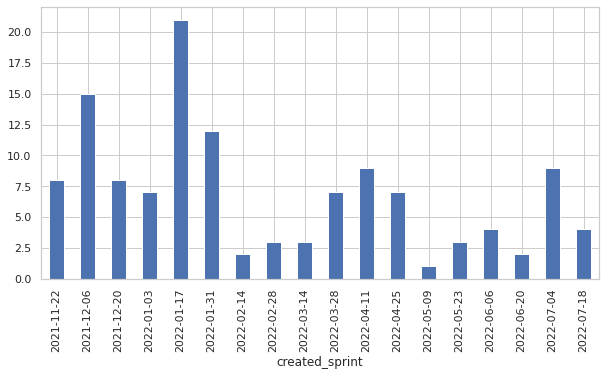

In [24]:
issues_per_sprint.issue.count().plot.bar()

[Text(0.5, 0, 'Reaction Time in d')]

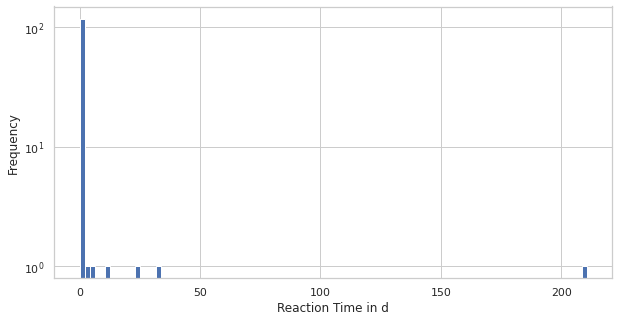

In [25]:
community_issues.time_to_react_days.plot.hist(bins=100, logy=True).set(xlabel='Reaction Time in d')

Because of the strong clustering of low reaction time, we look at the data again with more detail.

[Text(0.5, 0, 'Reaction Time in d')]

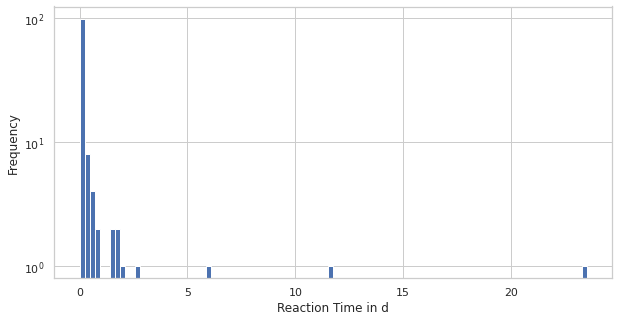

In [26]:
community_issues.time_to_react_days[community_issues.time_to_react <= timedelta(days=30)].plot.hist(bins=100, logy=True).set(xlabel='Reaction Time in d')

### Trimming the Data

In [27]:
outlier_threshold = timedelta(days=7)

In [28]:
community_issues[community_issues.time_to_react > outlier_threshold].issue.count()

4

In [29]:
focus_issues = community_issues[community_issues.time_to_react <= outlier_threshold]
issues_per_sprint = focus_issues.groupby('created_sprint')

### Explore the Data (II)

<AxesSubplot:xlabel='created_sprint'>

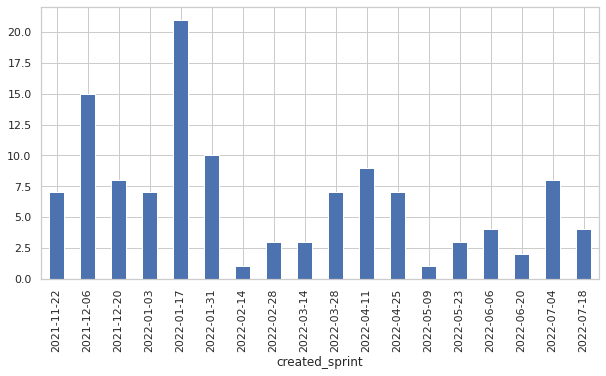

In [30]:
issues_per_sprint.issue.count().plot.bar()

<AxesSubplot:xlabel='created_sprint'>

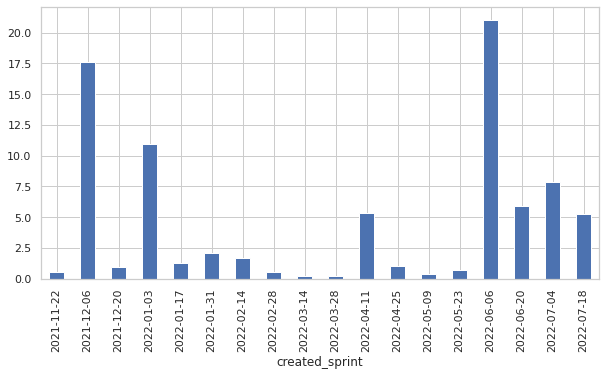

In [31]:
issues_per_sprint.time_to_react_hours.apply(numpy.mean).plot.bar()

<AxesSubplot:xlabel='created_sprint'>

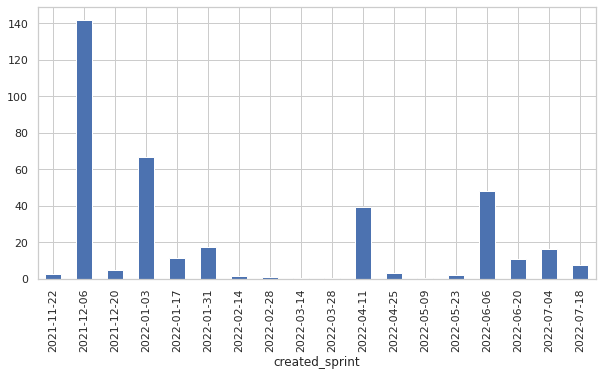

In [32]:
issues_per_sprint.time_to_react_hours.apply(numpy.max).plot.bar()

As we can see, the peaks of maxima and mean correlate. 

<AxesSubplot:xlabel='created_sprint'>

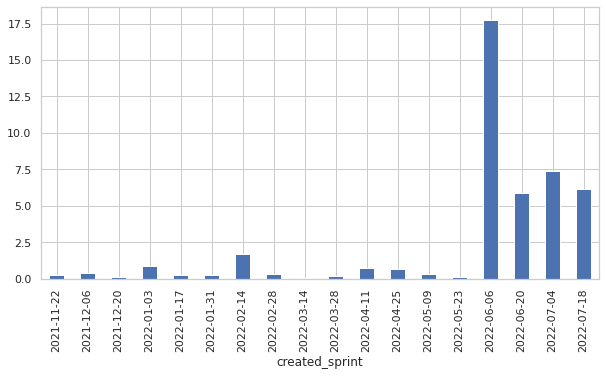

In [33]:
issues_per_sprint.time_to_react_hours.apply(numpy.median).plot.bar()

### Finding Causes

In [34]:
problem_sprints = [datetime(2022, 6, 6), datetime(2022, 6, 20), datetime(2022, 7, 4), datetime(2022, 7, 18)]

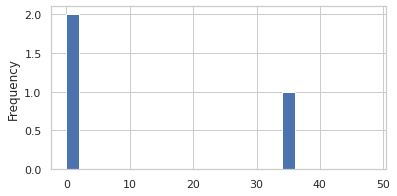

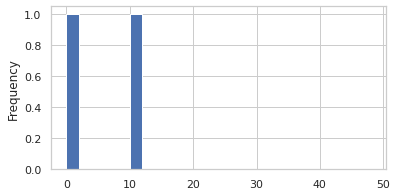

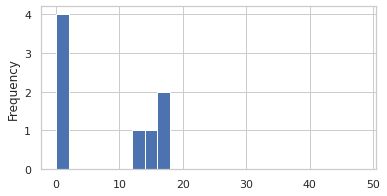

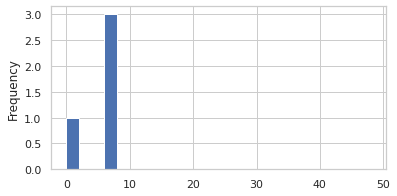

In [35]:
for sprint_begin in problem_sprints:
    pyplot.figure(figsize=(6, 3))
    (focus_issues[focus_issues.created_sprint == sprint_begin.date()].time_to_react_hours).plot.hist(bins=range(0,50, 2))

In [36]:
problem_issues = focus_issues[(focus_issues.created_at >= problem_sprints[0]) & (focus_issues.time_to_react >= timedelta(hours=10))]
problem_issues

,issue,issue_number,created_at,closed_at,created_sprint,closed_sprint,comments,first_reaction,time_to_react,time_to_react_hours,time_to_react_days
384,"Issue(title=""App shows new features note after...",5334,2022-07-10 18:43:02,2022-08-31 19:20:35,2022-07-04,2022-08-29,"[IssueComment(user=NamedUser(login=""larswmh""),...","IssueComment(user=NamedUser(login=""larswmh""), ...",0 days 14:26:27,14.440833,0.601701
385,"Issue(title=""Please merge version 2.24.2 into ...",5333,2022-07-10 18:30:50,2022-07-11 07:34:22,2022-07-04,2022-07-04,"[IssueComment(user=NamedUser(login=""schauersbe...","IssueComment(user=NamedUser(login=""schauersber...",0 days 13:03:32,13.058889,0.544120
386,"Issue(title=""Missing 2.24.2 GitHub release"", n...",5332,2022-07-10 14:43:42,2022-07-11 07:11:40,2022-07-04,2022-07-04,"[IssueComment(user=NamedUser(login=""Ein-Tim""),...","IssueComment(user=NamedUser(login=""schauersber...",0 days 16:27:58,16.466111,0.686088
394,"Issue(title=""Twitter Reports: App spams notifi...",5324,2022-07-05 13:54:48,2022-07-13 14:38:08,2022-07-04,2022-07-04,"[IssueComment(user=NamedUser(login=""Ein-Tim""),...","IssueComment(user=NamedUser(login=""dsarkar""), ...",0 days 16:29:36,16.493333,0.687222
420,"Issue(title=""Strange time format on ID history...",5296,2022-06-22 20:57:51,2022-09-30 10:46:03,2022-06-20,2022-09-26,"[IssueComment(user=NamedUser(login=""Ein-Tim""),...","IssueComment(user=NamedUser(login=""MikeMcC399""...",0 days 10:38:43,10.645278,0.443553
439,"Issue(title=""Twitter Report: ""Fertig"" button o...",5276,2022-06-11 21:52:37,2022-06-22 15:29:47,2022-06-06,2022-06-20,"[IssueComment(user=NamedUser(login=""larswmh""),...","IssueComment(user=NamedUser(login=""larswmh""), ...",1 days 10:45:31,34.758611,1.448275
441,"Issue(title=""Using back/forward buttons when r...",5274,2022-06-11 08:09:38,2022-09-12 08:25:52,2022-06-06,2022-09-12,"[IssueComment(user=NamedUser(login=""pief""), id...","IssueComment(user=NamedUser(login=""larswmh""), ...",2 days 00:17:55,48.298611,2.012442


In [37]:
problem_issues['created_day'] = problem_issues.created_at.apply(lambda date: date.day_name())
problem_issues

,issue,issue_number,created_at,closed_at,created_sprint,closed_sprint,comments,first_reaction,time_to_react,time_to_react_hours,time_to_react_days,created_day
384,"Issue(title=""App shows new features note after...",5334,2022-07-10 18:43:02,2022-08-31 19:20:35,2022-07-04,2022-08-29,"[IssueComment(user=NamedUser(login=""larswmh""),...","IssueComment(user=NamedUser(login=""larswmh""), ...",0 days 14:26:27,14.440833,0.601701,Sunday
385,"Issue(title=""Please merge version 2.24.2 into ...",5333,2022-07-10 18:30:50,2022-07-11 07:34:22,2022-07-04,2022-07-04,"[IssueComment(user=NamedUser(login=""schauersbe...","IssueComment(user=NamedUser(login=""schauersber...",0 days 13:03:32,13.058889,0.544120,Sunday
386,"Issue(title=""Missing 2.24.2 GitHub release"", n...",5332,2022-07-10 14:43:42,2022-07-11 07:11:40,2022-07-04,2022-07-04,"[IssueComment(user=NamedUser(login=""Ein-Tim""),...","IssueComment(user=NamedUser(login=""schauersber...",0 days 16:27:58,16.466111,0.686088,Sunday
394,"Issue(title=""Twitter Reports: App spams notifi...",5324,2022-07-05 13:54:48,2022-07-13 14:38:08,2022-07-04,2022-07-04,"[IssueComment(user=NamedUser(login=""Ein-Tim""),...","IssueComment(user=NamedUser(login=""dsarkar""), ...",0 days 16:29:36,16.493333,0.687222,Tuesday
420,"Issue(title=""Strange time format on ID history...",5296,2022-06-22 20:57:51,2022-09-30 10:46:03,2022-06-20,2022-09-26,"[IssueComment(user=NamedUser(login=""Ein-Tim""),...","IssueComment(user=NamedUser(login=""MikeMcC399""...",0 days 10:38:43,10.645278,0.443553,Wednesday
439,"Issue(title=""Twitter Report: ""Fertig"" button o...",5276,2022-06-11 21:52:37,2022-06-22 15:29:47,2022-06-06,2022-06-20,"[IssueComment(user=NamedUser(login=""larswmh""),...","IssueComment(user=NamedUser(login=""larswmh""), ...",1 days 10:45:31,34.758611,1.448275,Saturday
441,"Issue(title=""Using back/forward buttons when r...",5274,2022-06-11 08:09:38,2022-09-12 08:25:52,2022-06-06,2022-09-12,"[IssueComment(user=NamedUser(login=""pief""), id...","IssueComment(user=NamedUser(login=""larswmh""), ...",2 days 00:17:55,48.298611,2.012442,Saturday
